In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
churn = pd.read_csv("churn_data.csv")
churn.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No


In [4]:
customer = pd.read_csv("customer_data.csv")
customer.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No


In [5]:
internet = pd.read_csv("internet_data.csv")
internet.head(2)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No


In [6]:
#merging churn & customer dataset
df=pd.merge(churn,customer, on='customerID' , how="inner")

In [7]:
#merging internet & churn & customer dataset
df=pd.merge(df,internet, on='customerID' , how="inner")

In [8]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
#inspecting the data

#no missing values observed in the dataset

In [10]:
df.shape

(7043, 21)

In [11]:
df.describe([0.25,0.50,0.75,0.80,0.90,0.95,0.99])

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
80%,60.000000,94.250000,0.000000
90%,69.000000,102.600000,1.000000
95%,72.000000,107.400000,1.000000


no such outlier observed

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## data cleaning

In [13]:
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [14]:
#dropping customerid column as it doesn't hold any significant relation with churn data

df.drop("customerID", axis=1,inplace=True)

In [15]:
df.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [16]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [17]:
varlist=["PhoneService",'PaperlessBilling','Churn', 'Partner', 'Dependents']
def binary(x):
    return x.map({'Yes': 1, "No": 0})

df[varlist] = df[varlist].apply(binary)

In [18]:
df.head(2)

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No


In [19]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [20]:
c=pd.get_dummies(df.Contract)
df=pd.concat([df,c],axis=1)
df.drop(["Contract","Two year"],axis=1,inplace=True)
#since month_to_month was more useful than 2 year 
df.rename(columns = {'One year':'One year or +'},inplace=True)

In [21]:
#dummy value for payment method
pm=pd.get_dummies(df.PaymentMethod,drop_first=True)
df=pd.concat([df,pm],axis=1)
df.drop(["PaymentMethod"],axis=1,inplace=True)

In [22]:
#dummy value for gender
g=pd.get_dummies(df.gender,drop_first=True)
df=pd.concat([df,g],axis=1)
df.drop(["gender"],axis=1,inplace=True)

In [23]:
#dummy value for MultipleLines
ml=pd.get_dummies(df.MultipleLines,drop_first=True,prefix="Multipleline")
df=pd.concat([df,ml],axis=1)
df.drop(["MultipleLines"],axis=1,inplace=True)


In [24]:
df.drop(["Multipleline_No phone service"],axis=1,inplace=True)

In [25]:
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [26]:
#dummy value for DeviceProtection
dp=pd.get_dummies(df.DeviceProtection,drop_first=True,prefix="DeviceProtection")
df=pd.concat([df,dp],axis=1)
df.drop(["DeviceProtection"],axis=1,inplace=True)

df.drop(["DeviceProtection_No internet service"],axis=1,inplace=True)

In [27]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [28]:
#dummy value for TechSupport
ts=pd.get_dummies(df.TechSupport,drop_first=True,prefix="TechSupport")
df=pd.concat([df,ts],axis=1)
df.drop(["TechSupport"],axis=1,inplace=True)

df.drop(["TechSupport_No internet service"],axis=1,inplace=True)

In [29]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [30]:
#dummy value for StreamingTV
st=pd.get_dummies(df.StreamingTV,drop_first=True,prefix="StreamingTV")
df=pd.concat([df,st],axis=1)
df.drop(["StreamingTV"],axis=1,inplace=True)

df.drop(["StreamingTV_No internet service"],axis=1,inplace=True)

In [31]:
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [32]:
#dummy value for StreamingMovies
sm=pd.get_dummies(df.StreamingMovies,drop_first=True,prefix="StreamingMovies")
df=pd.concat([df,sm],axis=1)
df.drop(["StreamingMovies"],axis=1,inplace=True)

df.drop(["StreamingMovies_No internet service"],axis=1,inplace=True)

In [33]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [34]:
#dummy value for OnlineSecurity
os=pd.get_dummies(df.OnlineSecurity,drop_first=True,prefix="OnlineSecurity")
df=pd.concat([df,os],axis=1)
df.drop(["OnlineSecurity"],axis=1,inplace=True)

df.drop(["OnlineSecurity_No internet service"],axis=1,inplace=True)

In [35]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [36]:
#dummy value for InternetService
iser=pd.get_dummies(df.InternetService,prefix="InternetService")
df=pd.concat([df,iser],axis=1)
df.drop(["InternetService"],axis=1,inplace=True)

df.drop(["InternetService_No"],axis=1,inplace=True)

In [37]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [38]:
#dummy value for OnlineBackup
ob=pd.get_dummies(df.OnlineBackup,prefix="OnlineBackup")
df=pd.concat([df,ob],axis=1)
df.drop(["OnlineBackup"],axis=1,inplace=True)

df.drop(["OnlineBackup_No internet service"],axis=1,inplace=True)

In [39]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)

In [40]:
# method 1 for replacing strings with nulls
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#coerce is used to fill all the empty spaces with Nan's

In [41]:
#np.where(df.TotalCharges==" ")

In [42]:
#df["TotalCharges"][df.TotalCharges==" "]=np.NaN

In [43]:
#df['TotalCharges']=df['TotalCharges'].convert_objects(convert_numeric=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tenure                       7043 non-null   int64  
 1   PhoneService                 7043 non-null   int64  
 2   PaperlessBilling             7043 non-null   int64  
 3   MonthlyCharges               7043 non-null   float64
 4   TotalCharges                 7032 non-null   float64
 5   Churn                        7043 non-null   int64  
 6   SeniorCitizen                7043 non-null   int64  
 7   Partner                      7043 non-null   int64  
 8   Dependents                   7043 non-null   int64  
 9   Month-to-month               7043 non-null   uint8  
 10  One year or +                7043 non-null   uint8  
 11  Credit card (automatic)      7043 non-null   uint8  
 12  Electronic check             7043 non-null   uint8  
 13  Mailed check      

In [45]:
#percentage of missing values
11*100/7043

0.15618344455487718

In [46]:
df.TotalCharges.median()

1397.475

In [47]:
df["TotalCharges"].fillna(df.TotalCharges.median(),inplace=True)

## model building

In [48]:
#preprocessing data

In [49]:
#splitting using train_test_split

In [50]:
x=df.drop(["Churn"],axis=1)
y=df["Churn"]

In [51]:
df.shape,x.shape

((7043, 25), (7043, 24))

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=100,test_size=0.3)

In [53]:
#scaling

In [54]:
Scaler=StandardScaler()
xtrain[["MonthlyCharges","TotalCharges","tenure"]]=Scaler.fit_transform(xtrain[["MonthlyCharges","TotalCharges","tenure"]])

In [55]:
xtrain.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Month-to-month,One year or +,...,Multipleline_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineBackup_No,OnlineBackup_Yes
877,0.754422,0,0,-0.145568,0.350018,0,0,1,0,1,...,0,1,1,1,1,1,1,0,1,0
5792,-0.710751,1,1,1.051796,-0.379542,1,0,0,1,0,...,0,1,1,0,1,1,0,1,1,0
5334,0.673024,1,1,1.437668,1.329780,0,1,1,0,0,...,1,1,1,1,1,0,0,1,0,1
878,1.120716,1,0,0.006794,0.775531,0,0,0,0,1,...,1,1,1,0,0,1,1,0,1,0
6578,-0.914247,1,0,0.298268,-0.703794,0,0,1,0,1,...,1,1,1,0,1,1,1,0,1,0


<AxesSubplot:>

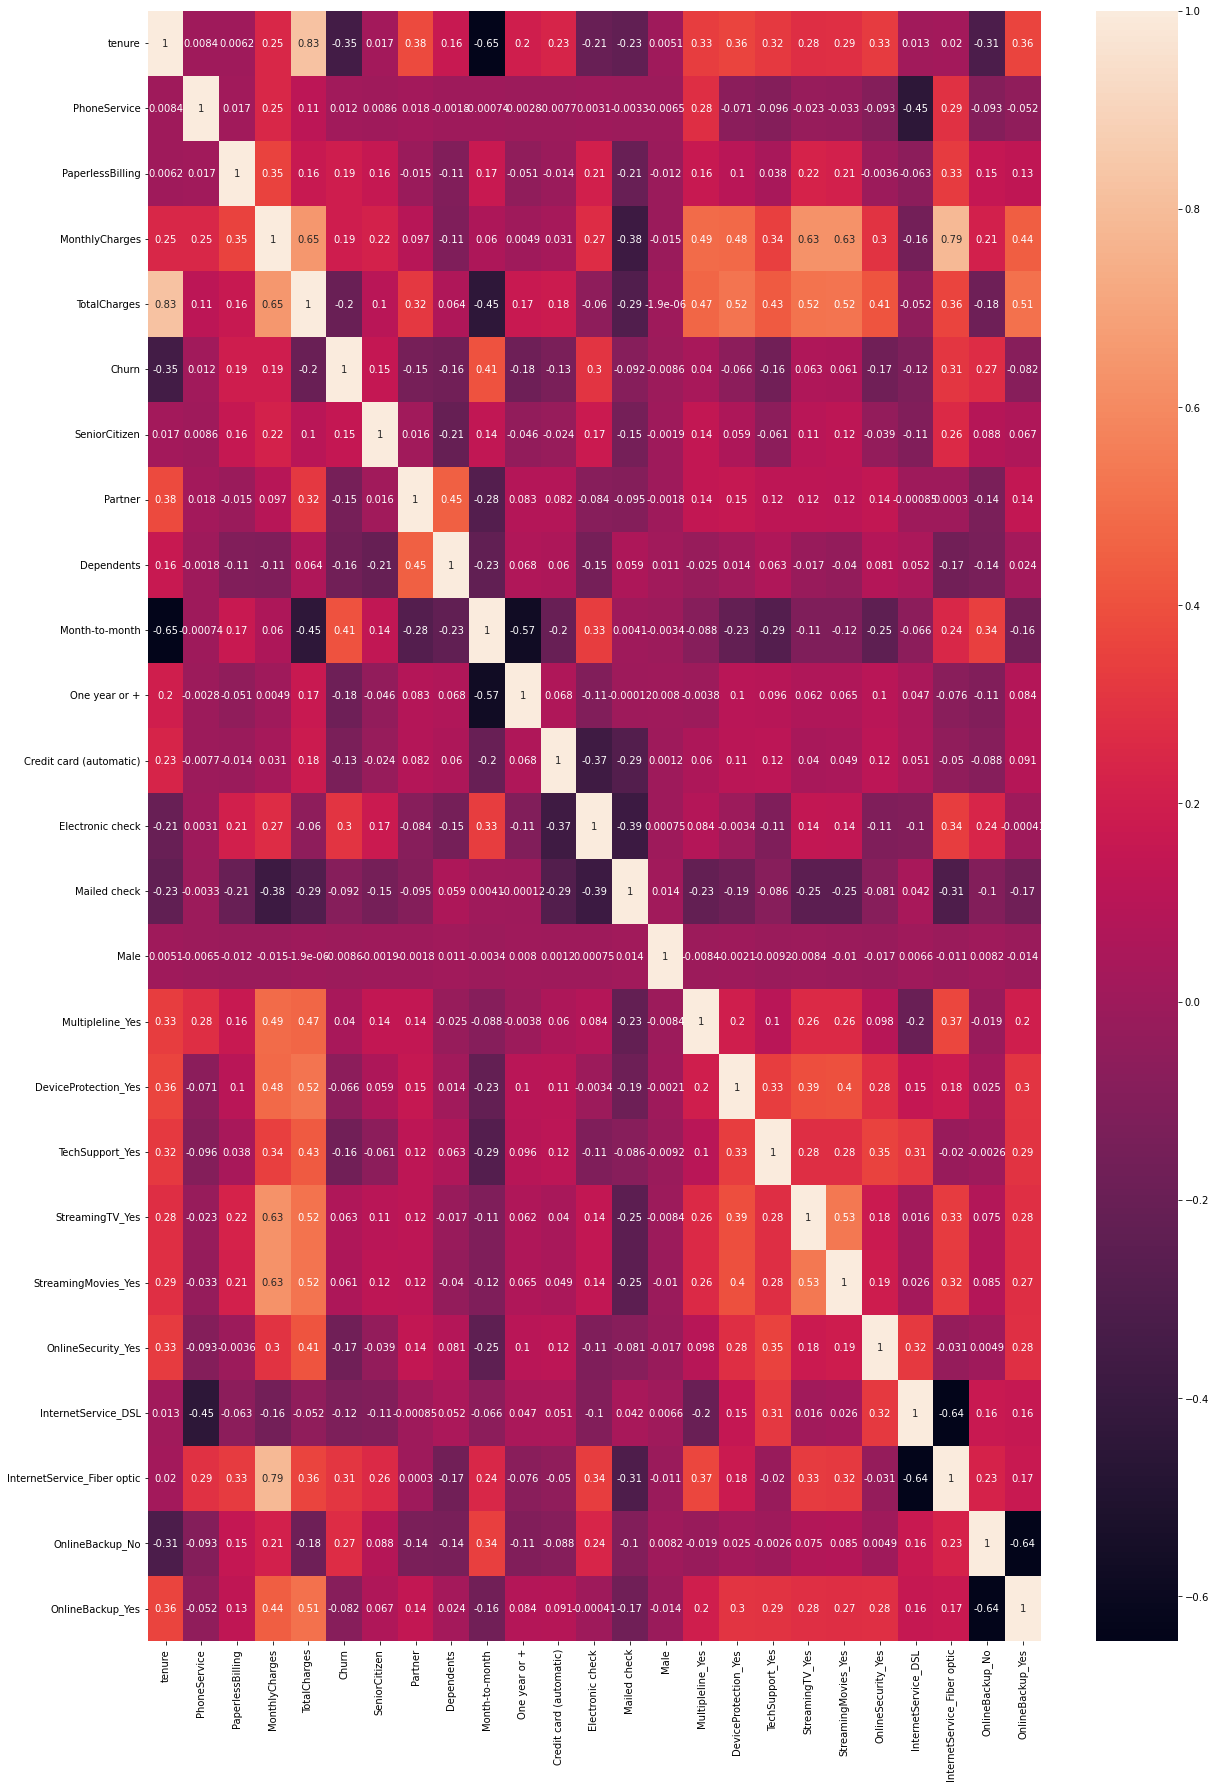

In [56]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(),annot=True)

## Feature selection using RFE

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [58]:
lr= LogisticRegression()
rfe= RFE(lr,15)
rfe=rfe.fit(xtrain,ytrain)

In [59]:
xtrain_col=xtrain.columns[rfe.support_]

In [60]:
x_train= xtrain[xtrain_col]

In [61]:
x_train.shape

(4930, 15)

In [62]:
#building model using GLM
model= sm.GLM(ytrain,(sm.add_constant(x_train)),family= sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.9
Date:                Sat, 04 Jun 2022   Deviance:                       4027.8
Time:                        13:28:36   Pearson chi2:                 5.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.3967      0.264    -12.847      0.000      -3.915      -2.879
tenure                         -1.3505      0.171     -7.887      0.000      -1.686      -1.015
PhoneService                   -0.6247      0.158     -3.957      0.000      -0.934      -0.315
PaperlessBilling                0.3606      0.090      4.017      0.000       0.185       0.536
TotalCharges                    0.6289      0.180      3.493      0.000       0.276       0.982
SeniorCitizen                   0.3321      0.101      3.304      0.001       0.135       0.529
Month-to-month                  1.3641      0.206      6.612      0.000       0.960       1.768
One year or +                   0.6775      0.208      3.260      0.001       0.270       1.085
Electronic check                0.3639      0.083      4.365      0.000       0.200       0.527
Multipleline_Yes                0.3011      0.096      3.141      0.002       0.113       0.489
TechSupport_Yes                -0.5047      0.104     -4.859      0.000      -0.708      -0.301
StreamingTV_Yes                 0.2300      0.095      2.424      0.015       0.044       0.416
OnlineSecurity_Yes             -0.3063      0.102     -3.011      0.003      -0.506      -0.107
InternetService_Fiber optic     0.7770      0.119      6.551      0.000       0.545       1.009
OnlineBackup_No                 0.9371      0.163      5.732      0.000       0.617       1.258
OnlineBackup_Yes                0.6584      0.179      3.687      0.000       0.308       1.008
===============================================================================================
"""

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TotalCharges,6.79
5,Month-to-month,6.76
1,PhoneService,5.92
13,OnlineBackup_No,5.42
14,OnlineBackup_Yes,5.05
0,tenure,4.78
12,InternetService_Fiber optic,4.19
2,PaperlessBilling,2.95
8,Multipleline_Yes,2.52
10,StreamingTV_Yes,2.51


In [64]:
x_train.drop("Month-to-month", axis=1, inplace=True)

In [65]:
x_train.head()

,tenure,PhoneService,PaperlessBilling,TotalCharges,SeniorCitizen,One year or +,Electronic check,Multipleline_Yes,TechSupport_Yes,StreamingTV_Yes,OnlineSecurity_Yes,InternetService_Fiber optic,OnlineBackup_No,OnlineBackup_Yes
877,0.754422,0,0,0.350018,0,1,0,0,1,1,1,0,1,0
5792,-0.710751,1,1,-0.379542,1,0,0,0,1,0,1,1,1,0
5334,0.673024,1,1,1.329780,0,0,0,1,1,1,0,1,0,1
878,1.120716,1,0,0.775531,0,1,1,1,1,0,1,0,1,0
6578,-0.914247,1,0,-0.703794,0,1,0,1,1,0,1,0,1,0


In [66]:
#model building 2

model2=sm.GLM(ytrain,(sm.add_constant(x_train)), family = sm.families.Binomial())
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4915
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.2
Date:                Sat, 04 Jun 2022   Deviance:                       4080.3
Time:                        13:28:36   Pearson chi2:                 5.30e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.4836      0.211    -11.785      0.000      -2.897      -2.071
tenure                         -1.4542      0.158     -9.181      0.000      -1.765      -1.144
PhoneService                   -0.6211      0.157     -3.966      0.000      -0.928      -0.314
PaperlessBilling                0.4011      0.089      4.490      0.000       0.226       0.576
TotalCharges                    0.5185      0.166      3.115      0.002       0.192       0.845
SeniorCitizen                   0.4047      0.101      4.021      0.000       0.207       0.602
One year or +                  -0.3576      0.120     -2.982      0.003      -0.593      -0.123
Electronic check                0.4217      0.083      5.058      0.000       0.258       0.585
Multipleline_Yes                0.3194      0.096      3.339      0.001       0.132       0.507
TechSupport_Yes                -0.6146      0.102     -5.998      0.000      -0.815      -0.414
StreamingTV_Yes                 0.2043      0.095      2.148      0.032       0.018       0.391
OnlineSecurity_Yes             -0.3635      0.101     -3.596      0.000      -0.562      -0.165
InternetService_Fiber optic     0.8597      0.117      7.340      0.000       0.630       1.089
OnlineBackup_No                 1.1153      0.162      6.901      0.000       0.799       1.432
OnlineBackup_Yes                0.8404      0.177      4.761      0.000       0.494       1.186
===============================================================================================
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TotalCharges,6.61
1,PhoneService,5.17
12,OnlineBackup_No,4.48
0,tenure,4.44
13,OnlineBackup_Yes,4.19
11,InternetService_Fiber optic,4.17
2,PaperlessBilling,2.91
7,Multipleline_Yes,2.52
9,StreamingTV_Yes,2.51
8,TechSupport_Yes,2.13


In [68]:
x_train.drop("TotalCharges",axis=1, inplace=True)

In [69]:
model3=sm.GLM(ytrain,(sm.add_constant(x_train)), family=sm.families.Binomial())
model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2045.2
Date:                Sat, 04 Jun 2022   Deviance:                       4090.4
Time:                        13:28:37   Pearson chi2:                 4.98e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.6819      0.199    -13.463      0.000      -3.072      -2.292
tenure                         -1.0090      0.060    -16.946      0.000      -1.126      -0.892
PhoneService                   -0.5302      0.151     -3.502      0.000      -0.827      -0.233
PaperlessBilling                0.3960      0.089      4.443      0.000       0.221       0.571
SeniorCitizen                   0.4068      0.101      4.025      0.000       0.209       0.605
One year or +                  -0.3555      0.119     -2.976      0.003      -0.590      -0.121
Electronic check                0.4140      0.084      4.954      0.000       0.250       0.578
Multipleline_Yes                0.3629      0.094      3.847      0.000       0.178       0.548
TechSupport_Yes                -0.5644      0.101     -5.568      0.000      -0.763      -0.366
StreamingTV_Yes                 0.2945      0.091      3.252      0.001       0.117       0.472
OnlineSecurity_Yes             -0.3211      0.100     -3.199      0.001      -0.518      -0.124
InternetService_Fiber optic     0.9901      0.109      9.093      0.000       0.777       1.204
OnlineBackup_No                 1.1553      0.161      7.176      0.000       0.840       1.471
OnlineBackup_Yes                0.9299      0.174      5.356      0.000       0.590       1.270
===============================================================================================
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,OnlineBackup_No,4.41
12,OnlineBackup_Yes,4.18
1,PhoneService,3.95
10,InternetService_Fiber optic,3.01
2,PaperlessBilling,2.89
6,Multipleline_Yes,2.43
8,StreamingTV_Yes,2.29
7,TechSupport_Yes,2.04
9,OnlineSecurity_Yes,1.98
5,Electronic check,1.93


In [71]:
x_train.drop("OnlineBackup_No", axis=1, inplace=True)

In [72]:
model4=sm.GLM(ytrain, (sm.add_constant(x_train)), family=sm.families.Binomial())
res=model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4917
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.4
Date:                Sat, 04 Jun 2022   Deviance:                       4144.7
Time:                        13:28:37   Pearson chi2:                 5.19e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.8016      0.153    -11.741      0.000      -2.102      -1.501
tenure                         -1.0737      0.059    -18.267      0.000      -1.189      -0.958
PhoneService                   -0.9406      0.144     -6.543      0.000      -1.222      -0.659
PaperlessBilling                0.4817      0.088      5.474      0.000       0.309       0.654
SeniorCitizen                   0.4388      0.101      4.332      0.000       0.240       0.637
One year or +                  -0.3920      0.118     -3.312      0.001      -0.624      -0.160
Electronic check                0.4972      0.083      6.001      0.000       0.335       0.660
Multipleline_Yes                0.4083      0.094      4.328      0.000       0.223       0.593
TechSupport_Yes                -0.4327      0.102     -4.251      0.000      -0.632      -0.233
StreamingTV_Yes                 0.3883      0.091      4.250      0.000       0.209       0.567
OnlineSecurity_Yes             -0.1601      0.100     -1.602      0.109      -0.356       0.036
InternetService_Fiber optic     1.3649      0.101     13.577      0.000       1.168       1.562
OnlineBackup_Yes               -0.1235      0.092     -1.338      0.181      -0.304       0.057
===============================================================================================
"""

In [73]:
x_train.shape 

(4930, 12)

In [74]:
x_train_sm=sm.add_constant(x_train)

In [75]:
y_train_pred_final=res.predict(x_train_sm).values.reshape(-1)

In [76]:
pred= pd.DataFrame()
pred["y_train_pred_prob"]=y_train_pred_final

pred.sample(10)

,y_train_pred_prob
3903,0.011319
101,0.487487
2815,0.036331
1547,0.049476
1915,0.702090
4076,0.458256
1129,0.083094
3377,0.020163
921,0.116938
3027,0.108299


In [77]:
#using thrshold value 0.5

In [78]:
pred["y_train_pred_class"] = pred["y_train_pred_prob"].apply(lambda x: 1 if x>0.5 else 0)

In [79]:
pred.sample(10)

,y_train_pred_prob,y_train_pred_class
1007,0.295222,0
3937,0.046810,0
2839,0.095756,0
330,0.227584,0
1333,0.633888,1
134,0.028529,0
141,0.646901,1
877,0.114469,0
4243,0.044117,0
1523,0.766736,1


In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [81]:
print(ytrain.shape)
print(pred["y_train_pred_class"].shape)

(4930,)
(4930,)


In [82]:
# Let's check the overall accuracy.
print(accuracy_score(ytrain,pred["y_train_pred_class"]))

0.8103448275862069


In [83]:
con= confusion_matrix(ytrain,pred["y_train_pred_class"])

In [84]:
print(con)

[[3303  324]
 [ 611  692]]


In [85]:
#senstivity 
# TP / TP + FN
print(con[1][1]/(con[1][0]+con[1][1]))

0.5310821181887951


In [86]:
#specificity
# TN/ TN + FP
print(con[0][0]/(con[0][0]+con[0][1]))

0.9106699751861043


## ROC CURVE

In [87]:
from sklearn import metrics

In [88]:
fpr,tpr , threshold = metrics.roc_curve( ytrain ,pred["y_train_pred_prob"] ,drop_intermediate = False )

In [89]:
auc_score = metrics.roc_auc_score( ytrain ,pred["y_train_pred_prob"] )

In [90]:
auc_score

0.8408448954830753

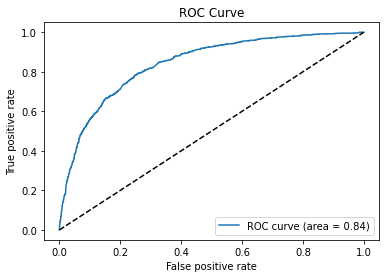

In [91]:
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0,1 ], 'k--')
plt.title("ROC Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc="lower right")
plt.show()

In [92]:
pred.head(2)

,y_train_pred_prob,y_train_pred_class
0,0.038856,0
1,0.428857,0


In [93]:
cutoffs= [i/10 for i in range (1,10)]
for i in cutoffs:
    pred[i]=pred.y_train_pred_prob.map(lambda x:1 if x>i else 0)
pred.head()

,y_train_pred_prob,y_train_pred_class,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.038856,0,0,0,0,0,0,0,0,0,0
1,0.428857,0,1,1,1,1,0,0,0,0,0
2,0.201356,0,1,1,0,0,0,0,0,0,0
3,0.017551,0,0,0,0,0,0,0,0,0,0
4,0.088091,0,0,0,0,0,0,0,0,0,0


In [94]:
cutoffs= [i/10 for i in range (1,10)]
cut = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in cutoffs:
    cm1= confusion_matrix(ytrain,pred[i])
    total = sum(sum(cm1))
    accuracy = (cm1[0,0]+ cm1[1,1])/total
    sens=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    spec=cm1[0][0]/(cm1[0][0]+cm1[0][1])
    cut.loc[i]=[i,accuracy, sens, spec]
print(cut)   

     prob  accuracy     sensi     speci
0.1   0.1  0.579513  0.940138  0.449959
0.2   0.2  0.719473  0.847276  0.673559
0.3   0.3  0.780933  0.699156  0.810312
0.4   0.4  0.802637  0.613968  0.870416
0.5   0.5  0.810345  0.531082  0.910670
0.6   0.6  0.804057  0.413661  0.944307
0.7   0.7  0.783773  0.254797  0.973808
0.8   0.8  0.752941  0.081351  0.994210
0.9   0.9  0.736917  0.004605  1.000000


In [95]:
cut

,prob,accuracy,sensi,speci
0.1,0.1,0.579513,0.940138,0.449959
0.2,0.2,0.719473,0.847276,0.673559
0.3,0.3,0.780933,0.699156,0.810312
0.4,0.4,0.802637,0.613968,0.870416
0.5,0.5,0.810345,0.531082,0.910670
0.6,0.6,0.804057,0.413661,0.944307
0.7,0.7,0.783773,0.254797,0.973808
0.8,0.8,0.752941,0.081351,0.994210
0.9,0.9,0.736917,0.004605,1.000000


<AxesSubplot:xlabel='prob'>

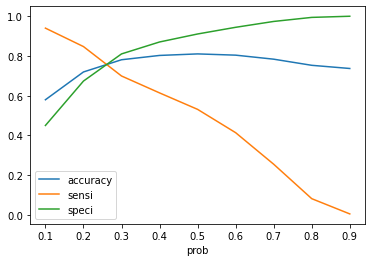

In [96]:
cut.plot.line(x="prob",y=["accuracy","sensi","speci"])

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [97]:
pred['final_predicted'] = pred.y_train_pred_prob.map( lambda x: 1 if x > 0.3 else 0)

In [98]:
pred.head()

,y_train_pred_prob,y_train_pred_class,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.038856,0,0,0,0,0,0,0,0,0,0,0
1,0.428857,0,1,1,1,1,0,0,0,0,0,1
2,0.201356,0,1,1,0,0,0,0,0,0,0,0
3,0.017551,0,0,0,0,0,0,0,0,0,0,0
4,0.088091,0,0,0,0,0,0,0,0,0,0,0


In [99]:
# Let's check the overall accuracy.
accuracy_score(ytrain, pred["final_predicted"])

0.7809330628803245

In [100]:
confusionmatrix = confusion_matrix(ytrain, pred["final_predicted"] )
confusionmatrix

array([[2939,  688],
       [ 392,  911]], dtype=int64)

In [101]:
print("sens",confusionmatrix[1,1]/(confusionmatrix[1,0]+confusionmatrix[1,1]))
print("spec",confusionmatrix[0][0]/(confusionmatrix[0][0]+confusionmatrix[0][1]))

sens 0.6991557943207981
spec 0.8103115522470361


## precision recall

In [102]:
from sklearn.metrics import classification_report , precision_score, recall_score, precision_recall_curve

In [103]:
confusion = metrics.confusion_matrix(ytrain,pred["y_train_pred_class"] )
confusion

array([[3303,  324],
       [ 611,  692]], dtype=int64)

In [104]:
#precision
#precision = TP / TP + FP
#confusion[1,1]/(confusion[0,1]+confusion[1,1])
print(precision_score(ytrain,pred["y_train_pred_class"]))

0.6811023622047244


In [105]:
#Recall = TP / TP + FN
#confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(recall_score(ytrain,pred["y_train_pred_class"]))

0.5310821181887951


In [106]:
print(classification_report(ytrain,pred["y_train_pred_class"]))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      3627
           1       0.68      0.53      0.60      1303

    accuracy                           0.81      4930
   macro avg       0.76      0.72      0.74      4930
weighted avg       0.80      0.81      0.80      4930



In [107]:
p, r, thresholds = precision_recall_curve(ytrain,pred["y_train_pred_prob"])

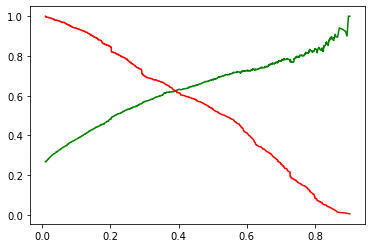

In [108]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [109]:
#cutoff point is 0.4

In [110]:
pred['final_predicted'] = pred.y_train_pred_prob.map( lambda x: 1 if x > 0.3 else 0)
accuracy_score(ytrain, pred["final_predicted"])


0.7809330628803245

In [111]:
confusionmatrix = confusion_matrix(ytrain, pred["final_predicted"] )
confusionmatrix

array([[2939,  688],
       [ 392,  911]], dtype=int64)

In [112]:
print("sens",confusionmatrix[1,1]/(confusionmatrix[1,0]+confusionmatrix[1,1]))
print("spec",confusionmatrix[0][0]/(confusionmatrix[0][0]+confusionmatrix[0][1]))

sens 0.6991557943207981
spec 0.8103115522470361


### Testing predictions

In [113]:
xtest.shape, ytest.shape

((2113, 24), (2113,))

In [114]:
tcol=x_train.columns

In [115]:
x_test=xtest[tcol]

In [116]:
x_test.shape

(2113, 12)

In [117]:
x_test_sm = sm.add_constant(x_test)

In [118]:
ytest_predictions = res.predict(x_test_sm)
ytest_predictions

4880    3.120292e-25
1541    1.720485e-35
1289    1.343664e-31
5745    5.642503e-30
4873    3.507285e-05
            ...     
1285    8.350807e-04
5092    3.507285e-05
5837    3.965507e-02
3597    8.596167e-13
3625    5.034408e-35
Length: 2113, dtype: float64

In [119]:
y_pred_1 = pd.DataFrame(ytest_predictions)

y_pred_1.columns

RangeIndex(start=0, stop=1, step=1)

In [120]:
predictions_final = y_pred_1[0].map(lambda x: 1 if x > 0.42 else 0)
predictions_final

4880    0
1541    0
1289    0
5745    0
4873    0
       ..
1285    0
5092    0
5837    0
3597    0
3625    0
Name: 0, Length: 2113, dtype: int64

In [121]:
metrics.accuracy_score(ytest,predictions_final)

0.7326076668244202